In [1]:
import pickle
import numpy as np

import interaction_constants
from qubit_system.geometry.regular_lattice_1d import RegularLattice1D
from qubit_system.qubit_system_classes import EvolvingQubitSystem
from qubit_system.utils.ghz_states import StandardGHZState
from qubit_system.utils.interpolation import get_hamiltonian_coeff_linear_interpolation

# Investigating $T_{\textrm{min}}$
## Evaluating how robust optimal control methods are

In [3]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family="serif", serif="CMU Serif")
plt.rc('text.latex', preamble=r'\usepackage{upgreek}')

In [2]:
N_RYD = 50
C6 = interaction_constants.get_C6(N_RYD)

LATTICE_SPACING = 1.5e-6

print(f"C6: {C6:.3e}")
characteristic_V = C6 / (LATTICE_SPACING ** 6)
print(f"Characteristic V: {characteristic_V:.3e} Hz")

norm_V = C6 / (LATTICE_SPACING ** 6) / characteristic_V


C6: 1.555e-26
Characteristic V: 1.365e+09 Hz


In [3]:
from demonstration_utils import *

Solved in 0.12s
fidelity with GHZ: 0.7489 (with antisymmetric: 0.1152)
superposition probability: 0.8641 (g: 0.4653, e: 0.3988)



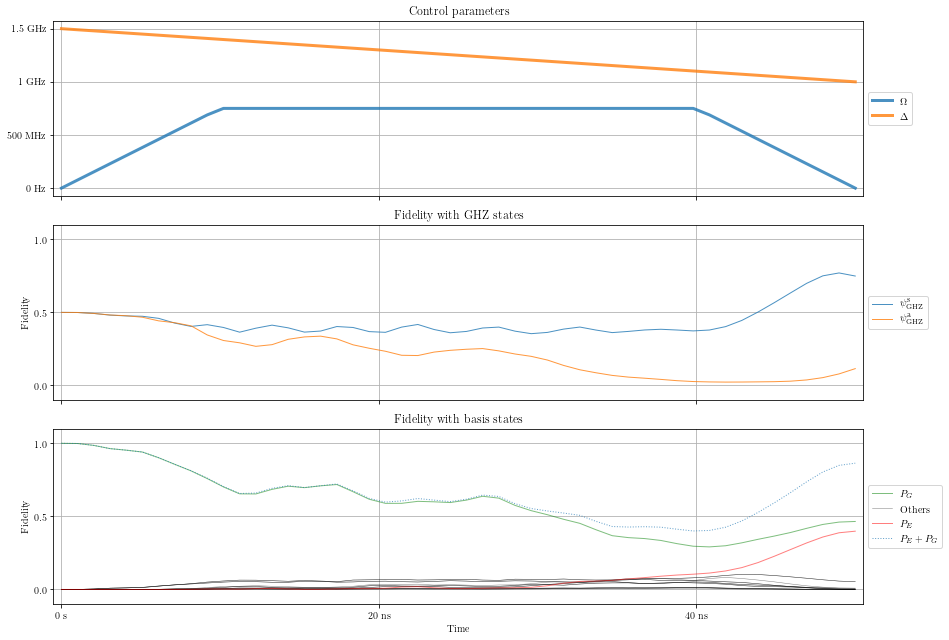

In [37]:
N = 4
t = 0.05e-6
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 5, t * 4 / 5, t], [0, 750e6, 750e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.5e9, 1e9]),
    t_list=np.linspace(0, t, 50),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)


------------------------------------
---- Control optimisation stats ----
**** Timings (HH:MM:SS.US) ****
Total wall time elapsed during optimisation: 0:00:41.301661
Wall time computing Hamiltonians: 0:00:00.918104 (2.22%)
Wall time computing propagators: 0:00:35.535914 (86.04%)
Wall time computing forward propagation: 0:00:00.170372 (0.41%)
Wall time computing onward propagation: 0:00:00.128003 (0.31%)
Wall time computing gradient: 0:00:00 (0.00%)

**** Iterations and function calls ****
Number of iterations: 9999
Number of fidelity function calls: 11396
Number of times fidelity is computed: 11397
Number of gradient function calls: 0
Number of times gradients are computed: 0
Number of times timeslot evolution is recomputed: 11397

**** Control amplitudes ****
Number of control amplitude updates: 11396
Mean number of updates per iteration: 1.1397139713971398
Number of timeslot values changed: 91167
Mean number of timeslot changes per update: 7.99991224991225
Number of amplitude values

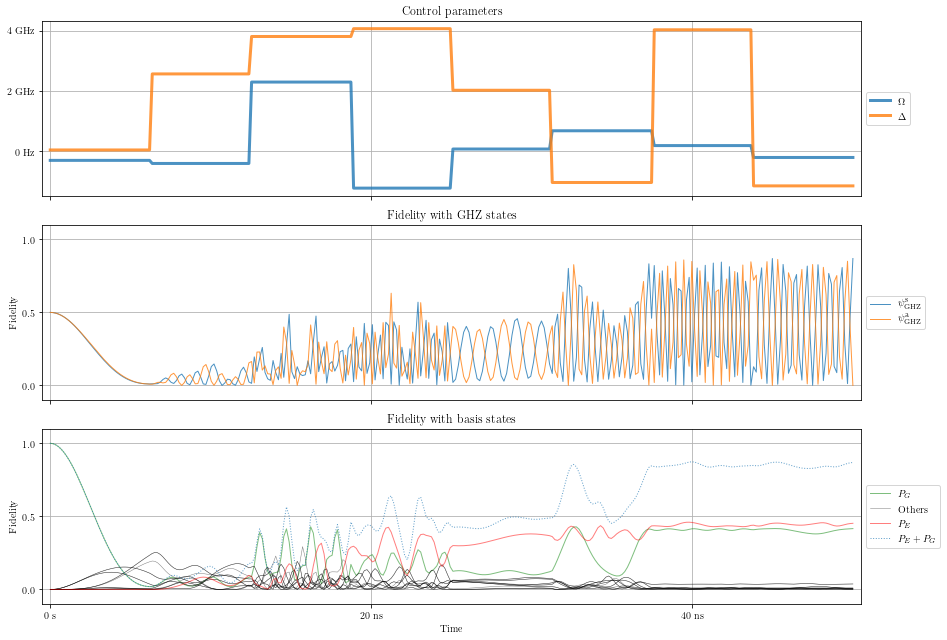

In [5]:
N = 4
t = 0.05e-6
norm_t = t * characteristic_V
optim_result = get_optimised_controls(N, n_ts=8, norm_t=norm_t, norm_V=norm_V, alg="CRAB")
report_stats(optim_result, N)
plot_optimresult(optim_result, N, t, C6, characteristic_V, geometry=RegularLattice1D(LATTICE_SPACING))


------------------------------------
---- Control optimisation stats ----
**** Timings (HH:MM:SS.US) ****
Total wall time elapsed during optimisation: 0:00:00.297587
Wall time computing Hamiltonians: 0:00:00.015450 (5.19%)
Wall time computing propagators: 0:00:00.222317 (74.71%)
Wall time computing forward propagation: 0:00:00.002553 (0.86%)
Wall time computing onward propagation: 0:00:00.002055 (0.69%)
Wall time computing gradient: 0:00:00.018795 (6.32%)

**** Iterations and function calls ****
Number of iterations: 118
Number of fidelity function calls: 134
Number of times fidelity is computed: 134
Number of gradient function calls: 134
Number of times gradients are computed: 134
Number of times timeslot evolution is recomputed: 134

**** Control amplitudes ****
Number of control amplitude updates: 133
Mean number of updates per iteration: 1.1271186440677967
Number of timeslot values changed: 1064
Mean number of timeslot changes per update: 8.0
Number of amplitude values changed: 20

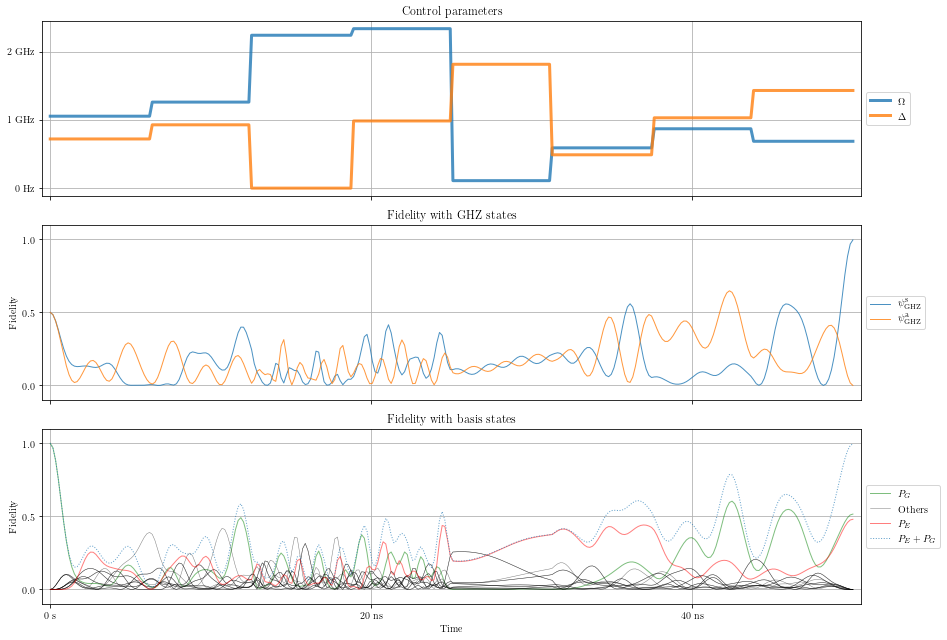

In [41]:
N = 4
t = 0.05e-6
norm_t = t * characteristic_V
optim_result = get_optimised_controls(N, n_ts=8, norm_t=norm_t, norm_V=norm_V)
report_stats(optim_result, N)
plot_optimresult(optim_result, N, t, C6, characteristic_V, geometry=RegularLattice1D(LATTICE_SPACING))

timesteps: 8
Solved in 0.24s
fidelity with GHZ: 0.9453 (with antisymmetric: 0.0116)
superposition probability: 0.9569 (g: 0.5570, e: 0.3999)



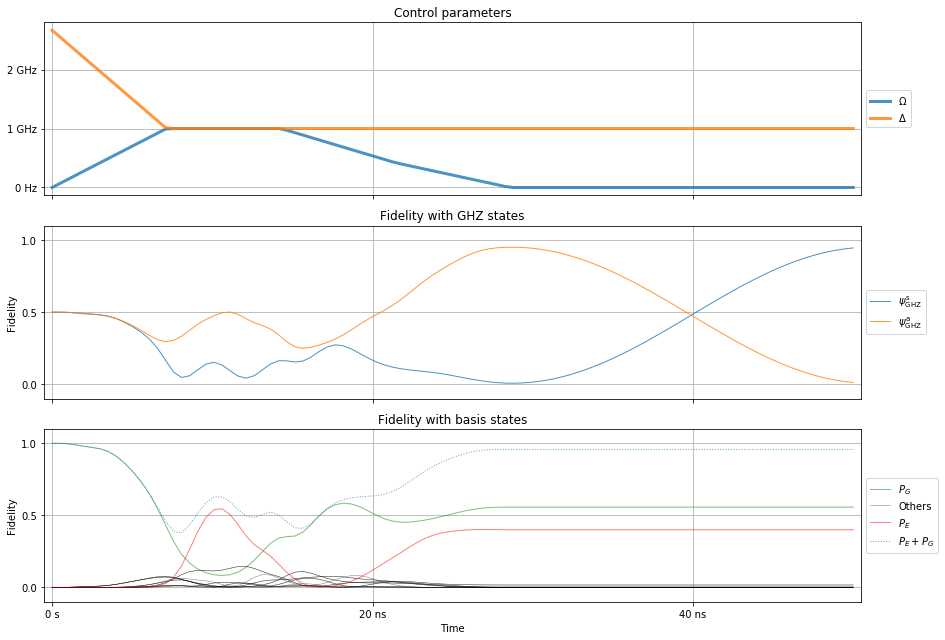

In [5]:
with open("reinforcement_learning/results/20190821_135329.pkl", "rb") as f:
    data = pickle.load(f)
assert data['evolving_qubit_system_kwargs']['N'] == 4
assert data['evolving_qubit_system_kwargs']['t_list'][-1] == 0.05e-6
t_list = data['evolving_qubit_system_kwargs']['t_list']
print(f'timesteps: {len(t_list)}')
solve_t_list = np.linspace(t_list[0], t_list[-1], 100)

data['evolving_qubit_system_kwargs'].pop('t_list')
e_qs = EvolvingQubitSystem(
    **data['evolving_qubit_system_kwargs'],
    Omega=get_hamiltonian_coeff_linear_interpolation(
        t_list,
        data['protocol'].Omega,
    ),
    Delta=get_hamiltonian_coeff_linear_interpolation(
        t_list,
        data['protocol'].Delta,
    ),
    t_list=solve_t_list,
)
solve_and_print_stats(e_qs)

Solved in 1.26s
fidelity with GHZ: 0.0008 (with antisymmetric: 0.9903)
superposition probability: 0.9911 (g: 0.4758, e: 0.5154)



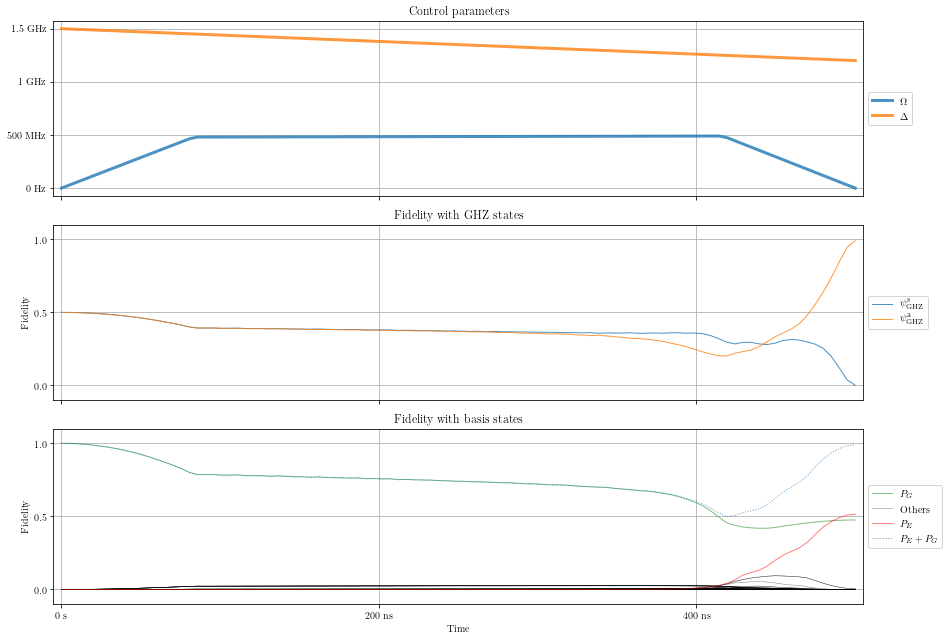

In [42]:
N = 8
t = 0.5e-6
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 6, t * 5 / 6, t], [0, 480e6, 490e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.5e9, 1.2e9]),
    t_list=np.linspace(0, t, 100),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

### GRAPE



------------------------------------
---- Control optimisation stats ----
**** Timings (HH:MM:SS.US) ****
Total wall time elapsed during optimisation: 0:02:28.176131
Wall time computing Hamiltonians: 0:00:13.192466 (8.90%)
Wall time computing propagators: 0:02:13.850089 (90.33%)
Wall time computing forward propagation: 0:00:00.228831 (0.15%)
Wall time computing onward propagation: 0:00:00.245131 (0.17%)
Wall time computing gradient: 0:00:00.553844 (0.37%)

**** Iterations and function calls ****
Number of iterations: 195
Number of fidelity function calls: 218
Number of times fidelity is computed: 218
Number of gradient function calls: 218
Number of times gradients are computed: 218
Number of times timeslot evolution is recomputed: 218

**** Control amplitudes ****
Number of control amplitude updates: 217
Mean number of updates per iteration: 1.1128205128205129
Number of timeslot values changed: 3243
Mean number of timeslot changes per update: 14.944700460829493
Number of amplitude val

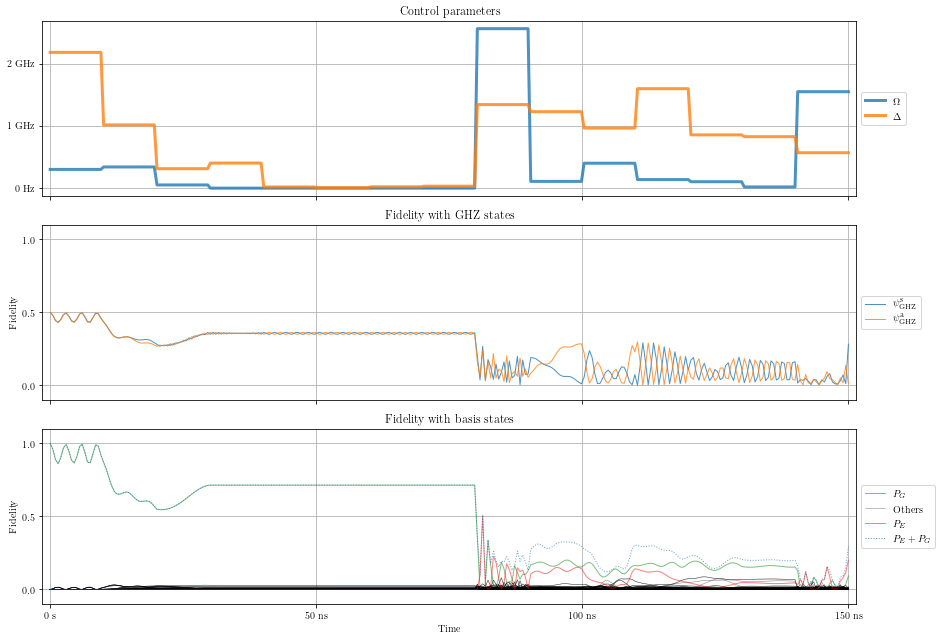

In [57]:
N = 8
t = 0.15e-6
norm_t = t * characteristic_V
optim_result = get_optimised_controls(N, n_ts=15, norm_t=norm_t, norm_V=norm_V)
report_stats(optim_result, N)
plot_optimresult(optim_result, N, t, C6, characteristic_V, geometry=RegularLattice1D(LATTICE_SPACING))

4e-08
timesteps: 15
Solved in 1.91s
fidelity with GHZ: 0.5275 (with antisymmetric: 0.0913)
superposition probability: 0.6188 (g: 0.0916, e: 0.5272)



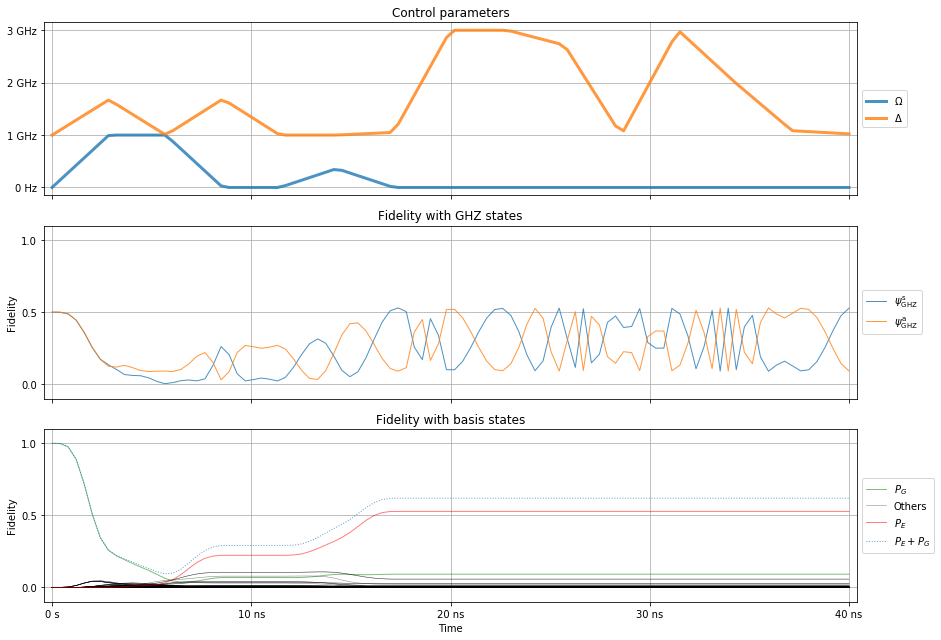

In [7]:
with open("reinforcement_learning/results/20190821_141010.pkl", "rb") as f:
    data = pickle.load(f)
assert data['evolving_qubit_system_kwargs']['N'] == 8
print(data['evolving_qubit_system_kwargs']['t_list'][-1])
t_list = data['evolving_qubit_system_kwargs']['t_list']
print(f'timesteps: {len(t_list)}')
solve_t_list = np.linspace(t_list[0], t_list[-1], 100)

data['evolving_qubit_system_kwargs'].pop('t_list')
e_qs = EvolvingQubitSystem(
    **data['evolving_qubit_system_kwargs'],
    Omega=get_hamiltonian_coeff_linear_interpolation(
        t_list,
        data['protocol'].Omega,
    ),
    Delta=get_hamiltonian_coeff_linear_interpolation(
        t_list,
        data['protocol'].Delta,
    ),
    t_list=solve_t_list,
)
solve_and_print_stats(e_qs)

